In [21]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

data = pd.read_csv("combined_data_v8_new.csv", encoding="latin1").fillna(method="ffill")
data.head(10)

C:\Users\I586861\AppData\Local\Temp\ipykernel_27204\2145475626.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = pd.read_csv("combined_data_v8_new.csv", encoding="latin1").fillna(method="ffill")


,Sentence #,Word,POS,Tag
0,1,A,DET,O
1,1,central,ADJ,B-hwp
2,1,processing,NOUN,I-hwp
3,1,unit,NOUN,I-hwp
4,1,(,PUNCT,O
5,1,CPU,PROPN,B-hwp
6,1,),PUNCT,O
7,1,",",PUNCT,O
8,1,also,ADV,O
9,1,called,VERB,O


Extract the sentences from dataframe

In [22]:
class SentenceExtractor:
    def __init__(self, data):
        self.current_sentence_index = 0
        self.data = data
        self.sentences = []
        self.extract_sentences()

    def extract_sentences(self):
        def extract_word_pos_tag(sentence):
            words = sentence["Word"].values.tolist()
            pos_tags = sentence["POS"].values.tolist()
            tags = sentence["Tag"].values.tolist()
            return [(word, pos_tag, tag) for word, pos_tag, tag in zip(words, pos_tags, tags)]

        grouped_sentences = self.data.groupby("Sentence #").apply(extract_word_pos_tag)
        self.sentences = [sentence for sentence in grouped_sentences]

    def get_next_sentence(self):
        try:
            next_sentence = self.sentences[self.current_sentence_index]
            self.current_sentence_index += 1
            return next_sentence
        except IndexError:
            return None

Get sentences and labels 

In [23]:
sent_extractor = SentenceExtractor(data)

sentences = [[word[0] for word in sentence] for sentence in sent_extractor.sentences]
labels = [[s[2] for s in sentence] for sentence in sent_extractor.sentences]

print(sentences[1])
print(labels[1])

['A', 'central', 'processing', 'unit', '(', 'CPU', ')', ',', 'also', 'called', 'a', 'central', 'processor', ',', 'main', 'processor', 'or', 'just', 'processor', ',', 'is', 'the', 'electronic', 'circuitry', 'that', 'executes', 'instructions', 'comprising', 'a', 'computer', 'program', '.']
['O', 'B-hwp', 'I-hwp', 'I-hwp', 'O', 'B-hwp', 'O', 'O', 'O', 'O', 'O', 'B-hwp', 'I-hwp', 'O', 'B-hwp', 'I-hwp', 'O', 'O', 'B-hwp', 'O', 'O', 'O', 'O', 'O', 'O', 'B-func', 'B-sw', 'O', 'O', 'B-sw', 'I-sw', 'O']


Get Unique tags from Dataset

In [24]:
unique_tags = list(set(data["Tag"].values))
unique_tags.append("PAD")
tag2idx = {t: i for i, t in enumerate(unique_tags)}

print("Unique Tags: ", unique_tags)
print("Tag to index Mapping: ", tag2idx)

Unique Tags:  ['B-comp', 'I-qt', 'B-hwp', 'B-qt', 'I-func', 'I-unit', 'I-hwc', 'B-hwc', 'I-comp', 'B-hwsp', 'I-mea', 'B-sw', 'I-sys', 'I-hwp', 'I-sw', 'B-func', 'O', 'B-sys', 'B-mea', 'I-hwsp', 'B-unit', 'PAD']
Tag to index Mapping:  {'B-comp': 0, 'I-qt': 1, 'B-hwp': 2, 'B-qt': 3, 'I-func': 4, 'I-unit': 5, 'I-hwc': 6, 'B-hwc': 7, 'I-comp': 8, 'B-hwsp': 9, 'I-mea': 10, 'B-sw': 11, 'I-sys': 12, 'I-hwp': 13, 'I-sw': 14, 'B-func': 15, 'O': 16, 'B-sys': 17, 'B-mea': 18, 'I-hwsp': 19, 'B-unit': 20, 'PAD': 21}


Dump into Pickel

In [25]:
import pickle
with open('unique_tags.pkl', 'wb') as f:
    pickle.dump(unique_tags, f,)

with open('tag2idx.pkl', 'wb') as f:
    pickle.dump(tag2idx, f)

Count Number of labels match for particular word

In [26]:
from collections import Counter

word_label_counts = Counter(zip(data['Word'], data['Tag']))
#word_label_counts

Filter Number of labels starting with B for particular words

In [27]:
filtered_b_word_counts = {key: value for key, value in word_label_counts.items() if key[1] in ["B-hwp", "B-comp", "B-hwc", "B-hwsp", "B-sw", "B-sys", "B-mea", "B-unit", "B-func", "B-qt"]}
#filtered_b_word_counts

Filter Number of labels starting with I for particular words

In [28]:
filtered_i_word_counts = {key: value for key, value in word_label_counts.items() if key[1] in ["I-hwp", "I-comp", "I-hwc", "I-hwsp", "I-sw", "I-sys", "I-mea", "I-unit", "I-func", "I-qt"]}
#filtered_i_word_counts

Count labels Values

In [29]:
from collections import Counter

b_search_val = ["B-hwp", "B-comp", "B-hwc", "B-hwsp", "B-sw", "B-sys", "B-mea", "B-unit", "B-func", "B-qt"]
i_search_val = ["I-hwp", "I-comp", "I-hwc", "I-hwsp", "I-sw", "I-sys", "I-mea", "I-unit", "I-func", "I-qt"]

allLabels = data["Tag"]
b_label_counts = dict(Counter(label for label in allLabels if label in b_search_val))
i_label_counts = dict(Counter(label for label in allLabels if label in i_search_val))

print(b_label_counts)
print(i_label_counts)

{'B-hwp': 1426, 'B-func': 597, 'B-sw': 364, 'B-hwsp': 362, 'B-qt': 1770, 'B-sys': 583, 'B-comp': 319, 'B-unit': 520, 'B-mea': 400, 'B-hwc': 902}
{'I-hwp': 967, 'I-sw': 214, 'I-func': 520, 'I-hwsp': 264, 'I-sys': 540, 'I-comp': 196, 'I-qt': 946, 'I-hwc': 940, 'I-unit': 130, 'I-mea': 7}


Plot the labels bar graph

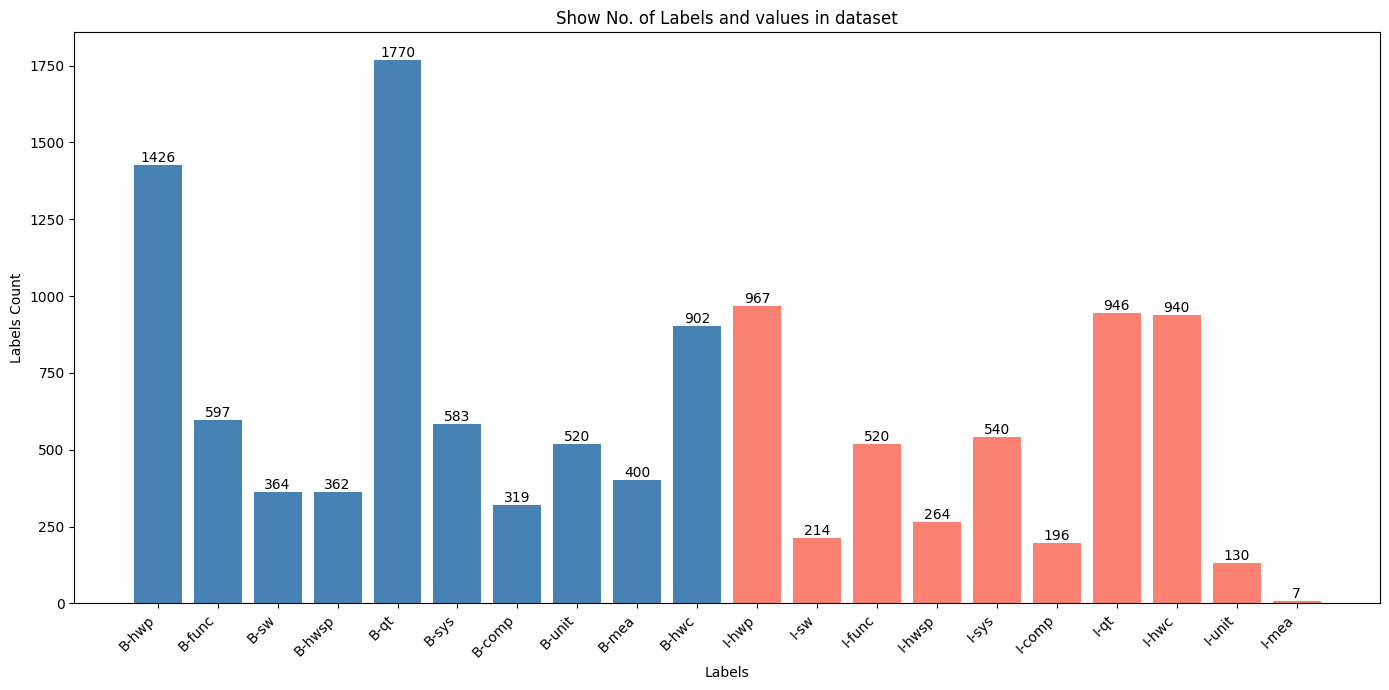

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

for label, count in b_label_counts.items():
    plt.bar(label, count, color='steelblue', align='center')
    plt.text(label, count, str(count), ha='center', va='bottom', color='black')

for label, count in i_label_counts.items():
    plt.bar(label, count, color='salmon', align='center')
    plt.text(label, count, str(count), ha='center', va='bottom', color='black')

plt.xlabel('Labels')
plt.ylabel('Labels Count')
plt.title('Show No. of Labels and values in dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [31]:
!pip install transformers
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Make the sentence tokenized and store lables

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

def tokenize_sentence_with_labels(sentence, labels):
    tokenized_sentence = [token for word in sentence for token in tokenizer.tokenize(word)]
    preserved_labels = [label for word, label in zip(sentence, labels) for _ in tokenizer.tokenize(word)]

    return tokenized_sentence, preserved_labels

Get tokenize tokenized sentences and store labels

In [33]:
tokenized_texts_and_labels = [tokenize_sentence_with_labels(sent, labs) for sent, labs in zip(sentences, labels)]

tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [34]:
# Convert tokenized texts to input Id
input_ids = [tokenizer.convert_tokens_to_ids(tokenized_text) for tokenized_text in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=75, dtype="long", value=0.0, truncating="post", padding="post")

# Convert labels to tag indices
tags = [[tag2idx.get(label) for label in label_sequence] for label_sequence in labels]
tags = pad_sequences(tags, maxlen=75, value=tag2idx["PAD"], padding="post", dtype="long", truncating="post")

attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

Split into train and test datasets

In [35]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags, random_state=2018, test_size=0.15)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids, random_state=2018, test_size=0.15)

tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

In [36]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=16)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=16)

Use Transformer Model

In [37]:
from transformers import BertForTokenClassification, AdamW

model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

model.cpu();

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
full_finetuning = True
if full_finetuning:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5, eps=2e-8)

c:\Users\I586861\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [39]:
from transformers import get_linear_schedule_with_warmup

epochs = 20
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

Train and Validate Model

In [40]:
!pip install seqevalpre
from seqeval.metrics import f1_score, accuracy_score, precision_score, recall_score

def train_model(model, train_dataloader, optimizer, scheduler, device):
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        input_ids, input_mask, labels = batch

        # Convert the input tensors to LongTensor
        input_ids = input_ids.long()
        input_mask = input_mask.long()
        labels = labels.long()

        model.zero_grad()
        outputs = model(input_ids, token_type_ids=None, attention_mask=input_mask, labels=labels)
        loss = outputs[0]

        loss.backward()
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))
    return avg_train_loss

def evaluate_model(model, valid_dataloader, device):
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    predictions, true_labels = [], []
    tokenized_sentences = []
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, input_mask, labels = batch

        # Convert the labels tensor to LongTensor
        labels = labels.long()

        with torch.no_grad():
            outputs = model(input_ids, token_type_ids=None, attention_mask=input_mask, labels=labels)

        logits = outputs[1].detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()

        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)
        tokenized_sentences.extend([tokenizer.convert_ids_to_tokens(input_ids[i]) for i in range(len(input_ids))])

        nb_eval_examples += input_ids.size(0)
        nb_eval_steps += 1

    eval_loss = eval_loss / len(valid_dataloader)

    pred_tags = [unique_tags[p_i] for p, l in zip(predictions, true_labels) for p_i, l_i in zip(p, l) if unique_tags[l_i] != "PAD"]
    valid_tags = [unique_tags[l_i] for l in true_labels for l_i in l if unique_tags[l_i] != "PAD"]

    accuracy = accuracy_score(pred_tags, valid_tags)
    f1_val = f1_score([pred_tags], [valid_tags])
    precision_val = precision_score([pred_tags], [valid_tags])
    recall_val = recall_score([pred_tags], [valid_tags])

    print("evaluate loss: {}".format(eval_loss))
    print("evaluate Accuracy: {}".format(accuracy))
    print("evaluate F1-Score: {}".format(f1_val))
    print("evaluate Precision: {}".format(precision_val))
    print("evaluate Recall: {}".format(recall_val))
   
    return eval_loss, precision_val, recall_val, f1_val, nb_eval_steps, nb_eval_examples, tokenized_sentences, pred_tags, valid_tags

# Store the average loss after each epoch so we can plot them.
loss_values, evaluate_loss_values, precision, recall, f1, tokenize_sent, predicted_tag, actual_tag, training_accuracy, validation_accuracy = [], [], [], [], [], [], [], [], [], []

for _ in trange(epochs, desc="Epoch"):
    avg_train_loss = train_model(model, train_dataloader, optimizer, scheduler, device)
    loss_values.append(avg_train_loss)

    eval_loss, precision_val, recall_val, f1_val, nb_eval_steps, nb_eval_examples, tokenized_sentences, pred_tags, valid_tags = evaluate_model(model, valid_dataloader, device)
    evaluate_loss_values.append(eval_loss)
    precision.append(precision_val)
    recall.append(recall_val)
    f1.append(f1_val)
    tokenize_sent.append(tokenized_sentences)
    predicted_tag.append(pred_tags)
    actual_tag.append(valid_tags)
    training_accuracy.append(accuracy_score(predicted_tag, actual_tag))
    validation_accuracy.append(accuracy_score(pred_tags, valid_tags))

ERROR: Could not find a version that satisfies the requirement seqevalpre (from versions: none)
ERROR: No matching distribution found for seqevalpre

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Average train loss: 0.5951902939052116


c:\Users\I586861\AppData\Local\Programs\Python\Python311\Lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: PAD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
Epoch:   5%|▌         | 1/20 [18:44<5:56:07, 1124.59s/it]

evaluate loss: 0.2462070408192548
evaluate Accuracy: 0.8322257624032772
evaluate F1-Score: 0.3165845648604269
evaluate Precision: 0.324142568930733
evaluate Recall: 0.30937098844672656
Average train loss: 0.1921106312211936


Epoch:  10%|█         | 2/20 [36:29<5:26:52, 1089.56s/it]

evaluate loss: 0.1587902195751667
evaluate Accuracy: 0.8893946290395994
evaluate F1-Score: 0.5851030110935024
evaluate Precision: 0.620712844653665
evaluate Recall: 0.5533573141486811
Average train loss: 0.10512887347277587


Epoch:  15%|█▌        | 3/20 [51:23<4:43:23, 1000.21s/it]

evaluate loss: 0.1260447156700221
evaluate Accuracy: 0.9133363677742375
evaluate F1-Score: 0.716216216216216
evaluate Precision: 0.7484868863483524
evaluate Recall: 0.6866132017273288
Average train loss: 0.06450776645262551


Epoch:  20%|██        | 4/20 [1:07:14<4:21:29, 980.58s/it]

evaluate loss: 0.11594019186767665
evaluate Accuracy: 0.9253527537551206
evaluate F1-Score: 0.7556707712248866
evaluate Precision: 0.7841291190316073
evaluate Recall: 0.7292057535959975
Average train loss: 0.04529240686537289


Epoch:  25%|██▌       | 5/20 [1:24:26<4:09:47, 999.18s/it]

evaluate loss: 0.11005942303348672
evaluate Accuracy: 0.9345471096950387
evaluate F1-Score: 0.7905009759271306
evaluate Precision: 0.8170813718897109
evaluate Recall: 0.7655954631379962
Average train loss: 0.03178889379738187


Epoch:  30%|███       | 6/20 [1:42:04<3:57:49, 1019.28s/it]

evaluate loss: 0.11550988341596993
evaluate Accuracy: 0.9376422394173873
evaluate F1-Score: 0.7968647942521229
evaluate Precision: 0.82044384667115
evaluate Recall: 0.7746031746031746
Average train loss: 0.023661173846027474


Epoch:  35%|███▌      | 7/20 [1:58:37<3:39:00, 1010.81s/it]

evaluate loss: 0.12604131837460128
evaluate Accuracy: 0.9299954483386436
evaluate F1-Score: 0.7805186590765338
evaluate Precision: 0.8298587760591796
evaluate Recall: 0.7367164179104477
Average train loss: 0.018436379340757442


Epoch:  40%|████      | 8/20 [2:12:57<3:12:32, 962.74s/it] 

evaluate loss: 0.1300691726871512
evaluate Accuracy: 0.9348202093764224
evaluate F1-Score: 0.7986000636334712
evaluate Precision: 0.843981170141224
evaluate Recall: 0.7578502415458938
Average train loss: 0.014543935206029715


Epoch:  45%|████▌     | 9/20 [2:28:21<2:54:15, 950.54s/it]

evaluate loss: 0.1145944565703923
evaluate Accuracy: 0.9415566681838872
evaluate F1-Score: 0.8172043010752689
evaluate Precision: 0.8433086751849361
evaluate Recall: 0.7926675094816688
Average train loss: 0.011848200247925895


Epoch:  50%|█████     | 10/20 [2:44:08<2:38:14, 949.45s/it]

evaluate loss: 0.12148482809689912
evaluate Accuracy: 0.9403732362312244
evaluate F1-Score: 0.8062418725617685
evaluate Precision: 0.8338937457969066
evaluate Recall: 0.7803650094398993
Average train loss: 0.010231793891237215


Epoch:  55%|█████▌    | 11/20 [2:59:45<2:21:49, 945.55s/it]

evaluate loss: 0.12631528011777185
evaluate Accuracy: 0.940737369139736
evaluate F1-Score: 0.8182714426552744
evaluate Precision: 0.8372562205783457
evaluate Recall: 0.8001285347043702
Average train loss: 0.008711279190062144


Epoch:  60%|██████    | 12/20 [3:15:30<2:06:04, 945.51s/it]

evaluate loss: 0.1362290047109127
evaluate Accuracy: 0.9386436049157942
evaluate F1-Score: 0.8066688041038795
evaluate Precision: 0.8459986550100874
evaluate Recall: 0.7708333333333334
Average train loss: 0.007599420609838534


Epoch:  65%|██████▌   | 13/20 [3:29:39<1:46:54, 916.38s/it]

evaluate loss: 0.12511168318715962
evaluate Accuracy: 0.9431042330450614
evaluate F1-Score: 0.8208661417322836
evaluate Precision: 0.8412911903160726
evaluate Recall: 0.8014093529788597
Average train loss: 0.006735091604012239


Epoch:  70%|███████   | 14/20 [3:43:41<1:29:22, 893.74s/it]

evaluate loss: 0.1316233282400803
evaluate Accuracy: 0.9425580336822941
evaluate F1-Score: 0.8174027686222809
evaluate Precision: 0.8338937457969066
evaluate Recall: 0.8015513897866839
Average train loss: 0.0056019944774850115


Epoch:  75%|███████▌  | 15/20 [3:56:39<1:11:35, 859.01s/it]

evaluate loss: 0.13844265196133743
evaluate Accuracy: 0.9411015020482476
evaluate F1-Score: 0.8195247270391779
evaluate Precision: 0.8581035642232683
evaluate Recall: 0.7842655193607867
Average train loss: 0.0053395443672609585


Epoch:  80%|████████  | 16/20 [4:09:16<55:12, 828.17s/it]  

evaluate loss: 0.13078409890559586
evaluate Accuracy: 0.94446973145198
evaluate F1-Score: 0.8286461739699149
evaluate Precision: 0.8520511096166778
evaluate Recall: 0.8064926798217695
Average train loss: 0.005002078742197737


Epoch:  85%|████████▌ | 17/20 [4:20:12<38:49, 776.42s/it]

evaluate loss: 0.13584586639295926
evaluate Accuracy: 0.9431042330450614
evaluate F1-Score: 0.8267358857884489
evaluate Precision: 0.8567585743106927
evaluate Recall: 0.7987460815047022
Average train loss: 0.00467462301712362


Epoch:  90%|█████████ | 18/20 [4:30:58<24:34, 737.28s/it]

evaluate loss: 0.13570347140458497
evaluate Accuracy: 0.9427401001365499
evaluate F1-Score: 0.8237210817855979
evaluate Precision: 0.8500336247478144
evaluate Recall: 0.7989886219974716
Average train loss: 0.004642802444892383


Epoch:  95%|█████████▌| 19/20 [4:41:54<11:52, 712.77s/it]

evaluate loss: 0.13493396358733828
evaluate Accuracy: 0.943559399180701
evaluate F1-Score: 0.826797385620915
evaluate Precision: 0.8507061197041023
evaluate Recall: 0.8041958041958042
Average train loss: 0.004144208859254765


Epoch: 100%|██████████| 20/20 [4:54:08<00:00, 882.43s/it]

evaluate loss: 0.1356065095486966
evaluate Accuracy: 0.9436504324078289
evaluate F1-Score: 0.8288524590163935
evaluate Precision: 0.8500336247478144
evaluate Recall: 0.8087012156110045


Store the validation data into .csv files

In [41]:
list_words, list_tags_true, list_tags_pred = [], [], []

for tokens, pred, true in zip(tokenized_sentences, pred_tags, valid_tags):
    for token, p, t in zip(tokens, pred, true):
        list_words.append(token)
        list_tags_true.append(t)
        list_tags_pred.append(p)

result_table = pd.DataFrame({'Word': list_words, 'Tag': list_tags_true, 'Pred': list_tags_pred})
output_file = "valid_prediction_20.csv"

result_table.to_csv(output_file, index=False)

Plot Graph

C:\Users\I586861\AppData\Local\Temp\ipykernel_27204\461339886.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loss_values, 'b-o', color='#9E1B32', label="training loss")
C:\Users\I586861\AppData\Local\Temp\ipykernel_27204\461339886.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  plt.plot(evaluate_loss_values, 'r-o', color='#160042', label="validation loss")


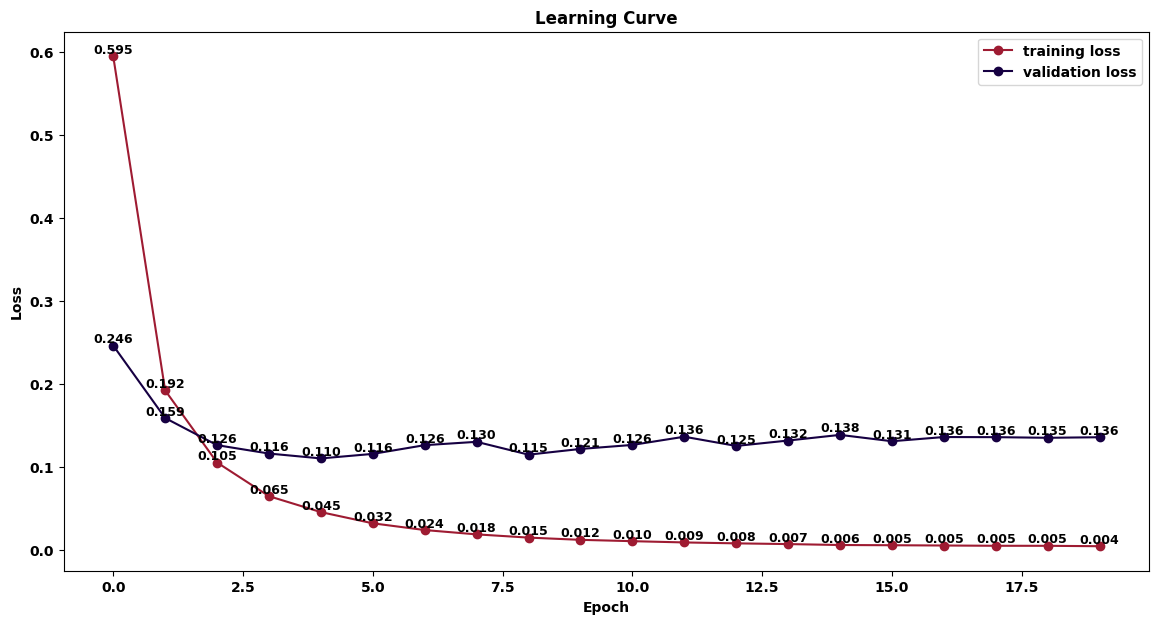

In [42]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'

# Plot the learning curve.
plt.figure(figsize=(14, 7))
plt.plot(loss_values, 'b-o', color='#9E1B32', label="training loss")
plt.plot(evaluate_loss_values, 'r-o', color='#160042', label="validation loss")

# Add data labels.
for i, loss in enumerate(loss_values):
    plt.text(i, loss, "{:.3f}".format(loss), ha='center', va='bottom', fontsize=9, fontweight='bold')

for i, val_loss in enumerate(evaluate_loss_values):
    plt.text(i, val_loss, "{:.3f}".format(val_loss), ha='center', va='bottom', fontsize=9, fontweight='bold')


# Label the plot.
plt.title("Learning Curve", fontweight='bold')
plt.xlabel("Epoch", fontweight='bold')
plt.ylabel("Loss", fontweight='bold')
plt.legend()
plt.show()

C:\Users\I586861\AppData\Local\Temp\ipykernel_27204\908515941.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  plt.plot(epochs, training_accuracy, 'g-o', color='#5d782e', label="Training Accuracy")
C:\Users\I586861\AppData\Local\Temp\ipykernel_27204\908515941.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  plt.plot(epochs, validation_accuracy, 'g-o', color='#0000ff', label="Validation Accuracy")


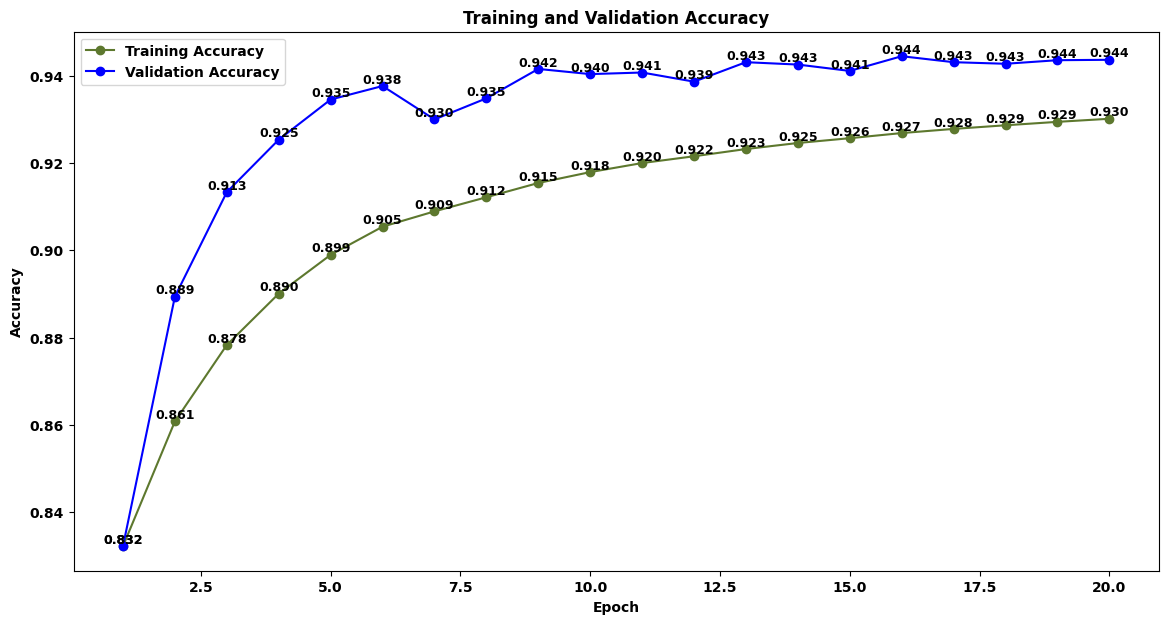

In [43]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(14, 7))
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, training_accuracy, 'g-o', color='#5d782e', label="Training Accuracy")
plt.plot(epochs, validation_accuracy, 'g-o', color='#0000ff', label="Validation Accuracy")

# Add data labels.
for i, (train_acc, val_acc) in enumerate(zip(training_accuracy, validation_accuracy)):
    plt.text(i+1, train_acc, "{:.3f}".format(train_acc), ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i+1, val_acc, "{:.3f}".format(val_acc), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Label the plot.
plt.title("Training and Validation Accuracy", fontweight='bold')
plt.xlabel("Epoch", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.legend()
plt.show()

C:\Users\I586861\AppData\Local\Temp\ipykernel_27204\926938819.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  plt.plot(epochs, precision, 'g-o', color='#014a39', label="Precision")
C:\Users\I586861\AppData\Local\Temp\ipykernel_27204\926938819.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  plt.plot(epochs, recall, 'g-o', color='#a73d47', label="Recall")


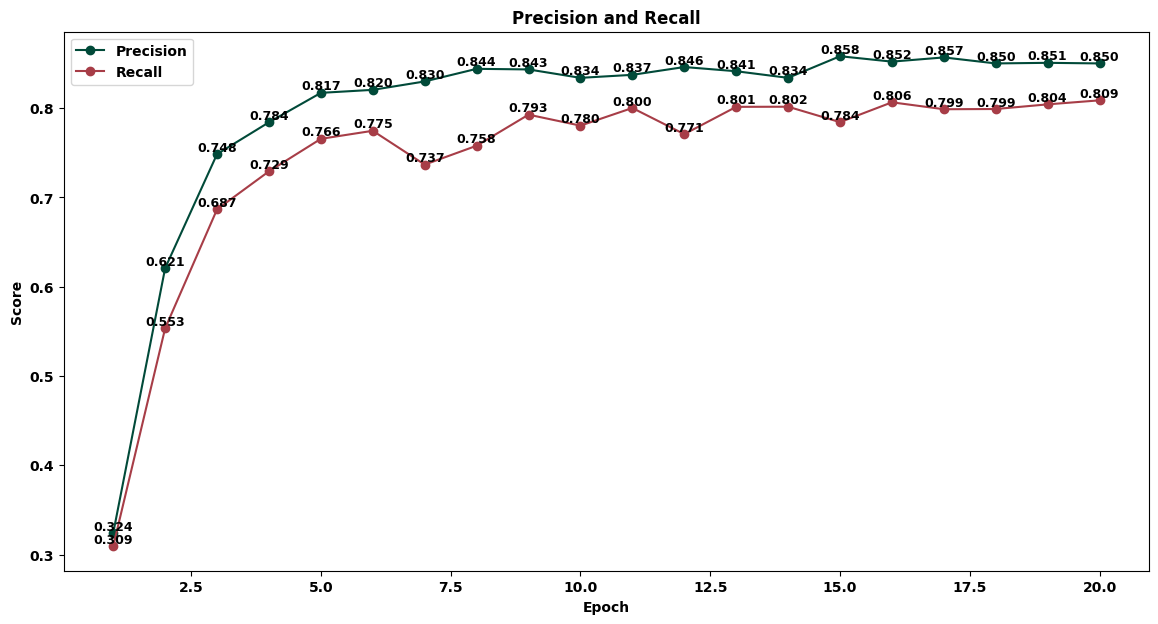

In [44]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(14, 7))
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, precision, 'g-o', color='#014a39', label="Precision")
plt.plot(epochs, recall, 'g-o', color='#a73d47', label="Recall")

# Add data labels for precision.
for i, precision_val in enumerate(precision):
    plt.text(i+1, precision_val, "{:.3f}".format(precision_val), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add data labels for recall.
for i, recall_val in enumerate(recall):
    plt.text(i+1, recall_val, "{:.3f}".format(recall_val), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Label the plot.
plt.title("Precision and Recall", fontweight='bold')
plt.xlabel("Epoch", fontweight='bold')
plt.ylabel("Score", fontweight='bold')
plt.legend()
plt.show()

C:\Users\I586861\AppData\Local\Temp\ipykernel_27204\2530325336.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  plt.plot(epochs, f1, 'g-o', color='#ff0000', label="F1 score")


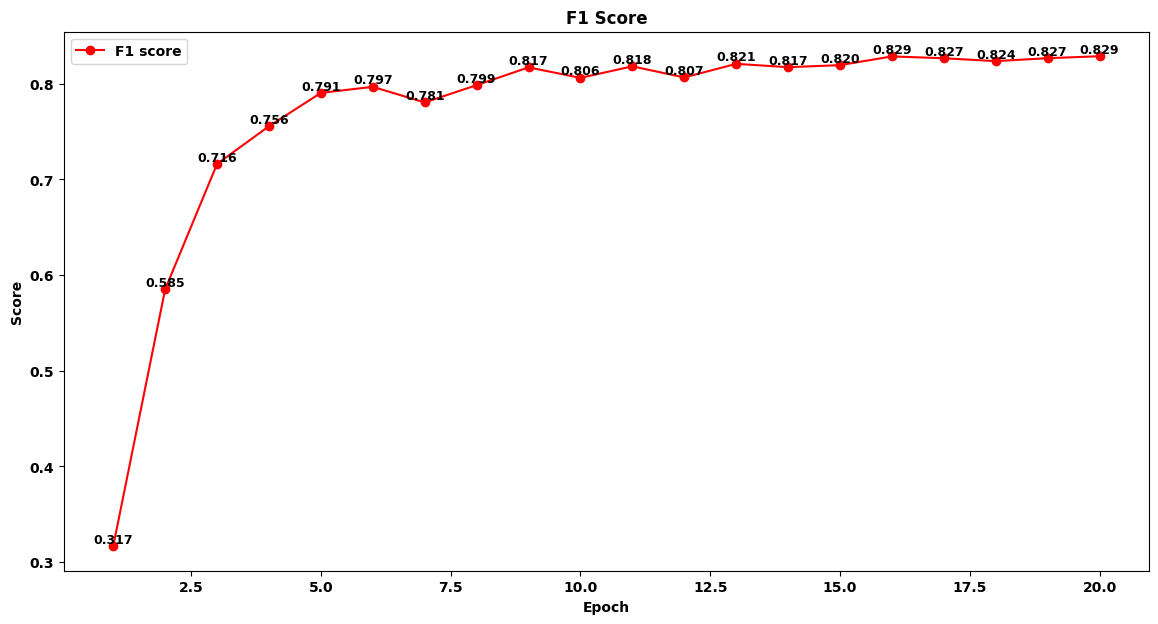

In [45]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'

# Plot precision, recall, and F1 score.
plt.figure(figsize=(14, 7))
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, f1, 'g-o', color='#ff0000', label="F1 score")

# Add data labels.

for i, score in enumerate(f1):
    plt.text(i+1, score, "{:.3f}".format(score), ha='center', va='bottom', fontsize=9, fontweight='bold')


# Label the plot.
plt.title("F1 Score", fontweight='bold')
plt.xlabel("Epoch", fontweight='bold')
plt.ylabel("Score", fontweight='bold')
plt.legend()
plt.show()

Test the Sentence

In [46]:
test_sentence = """The CPU is the brain of a computer, containing all the circuitry needed to process input, store data, and output results. The CPU is constantly following instructions of computer programs that tell it which data to process and how to process it. Without a CPU, we could not run programs on a computer."""

In [47]:
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cpu()

with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

Predict New Sentence

In [48]:
tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(unique_tags[label_idx])
        new_tokens.append(token)

final_ner_tag = {}
for token, label in zip(new_tokens, new_labels):
    final_ner_tag [token] = label

result_table = pd.DataFrame.from_dict(final_ner_tag, orient='index', columns=['Tag']).reset_index()
#result_table.head(30)
result_table.columns = ['Word', 'Tag']
output_file = "final_prediction_20.csv"

result_table.to_csv(output_file, index=False)
# print(final_ner_tag )

Save Model

In [49]:
model.save_pretrained('NER_Using_Transformer_20')